In [1]:
import numpy as np
import matplotlib.pyplot as plt

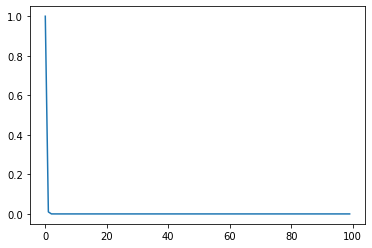

In [13]:
Nx = 100
dt = 0.01
dx = (1/(Nx+1))
S = dt/(dx*dx)
D = 10**(-6)

def apply_boundaries(C):
    C[0] = 1
    C[-1] = C[-2]
    return C

def advance(C):
    new_C = np.empty(len(C))
    for i in range(1, len(C)-1):
        new_C[i] = C[i] + D*S*(C[i-1] - 2*C[i] + C[i+1])
    apply_boundaries(new_C)
    return new_C
C = np.zeros(Nx)
C = apply_boundaries(C)
res = [C]

for i in range(100):
    C = advance(C)
    #res.append(C)

plt.yscale("log")
plt.plot(C)